# Pillow (PIL)

Overview
The Python Imaging Library adds image processing capabilities to your Python interpreter.

This library provides extensive file format support, an efficient internal representation, and fairly powerful image processing capabilities.

The core image library is designed for fast access to data stored in a few basic pixel formats. It should provide a solid foundation for a general image processing tool.

## installing PIL

In [2]:
!python -m pip install --upgrade Pillow

  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 0.82.0 requires click<8.0,>=7.0, but you have click 8.0.1 which is incompatible.


### to rename in bulks

In [ ]:
import os
counter = 0
dir_path = "images/original/"

for file in os.listdir(dir_path):
    file_name, file_exension = file.split('.')
    new_file_name = f"image{counter}.{file_exension}"
    
    os.rename(os.path.join(dir_path, file), os.path.join(dir_path, new_file_name))
    counter += 1

print(f"renamed {counter} files")

## importing PIL and display an image

In [9]:
from PIL import Image

file_name = "images/original/image15.jpeg"
image = Image.open(file_name)  # opening a file very fast operation
image.show()                   # slow operation

## displaying image in jupyter notebook

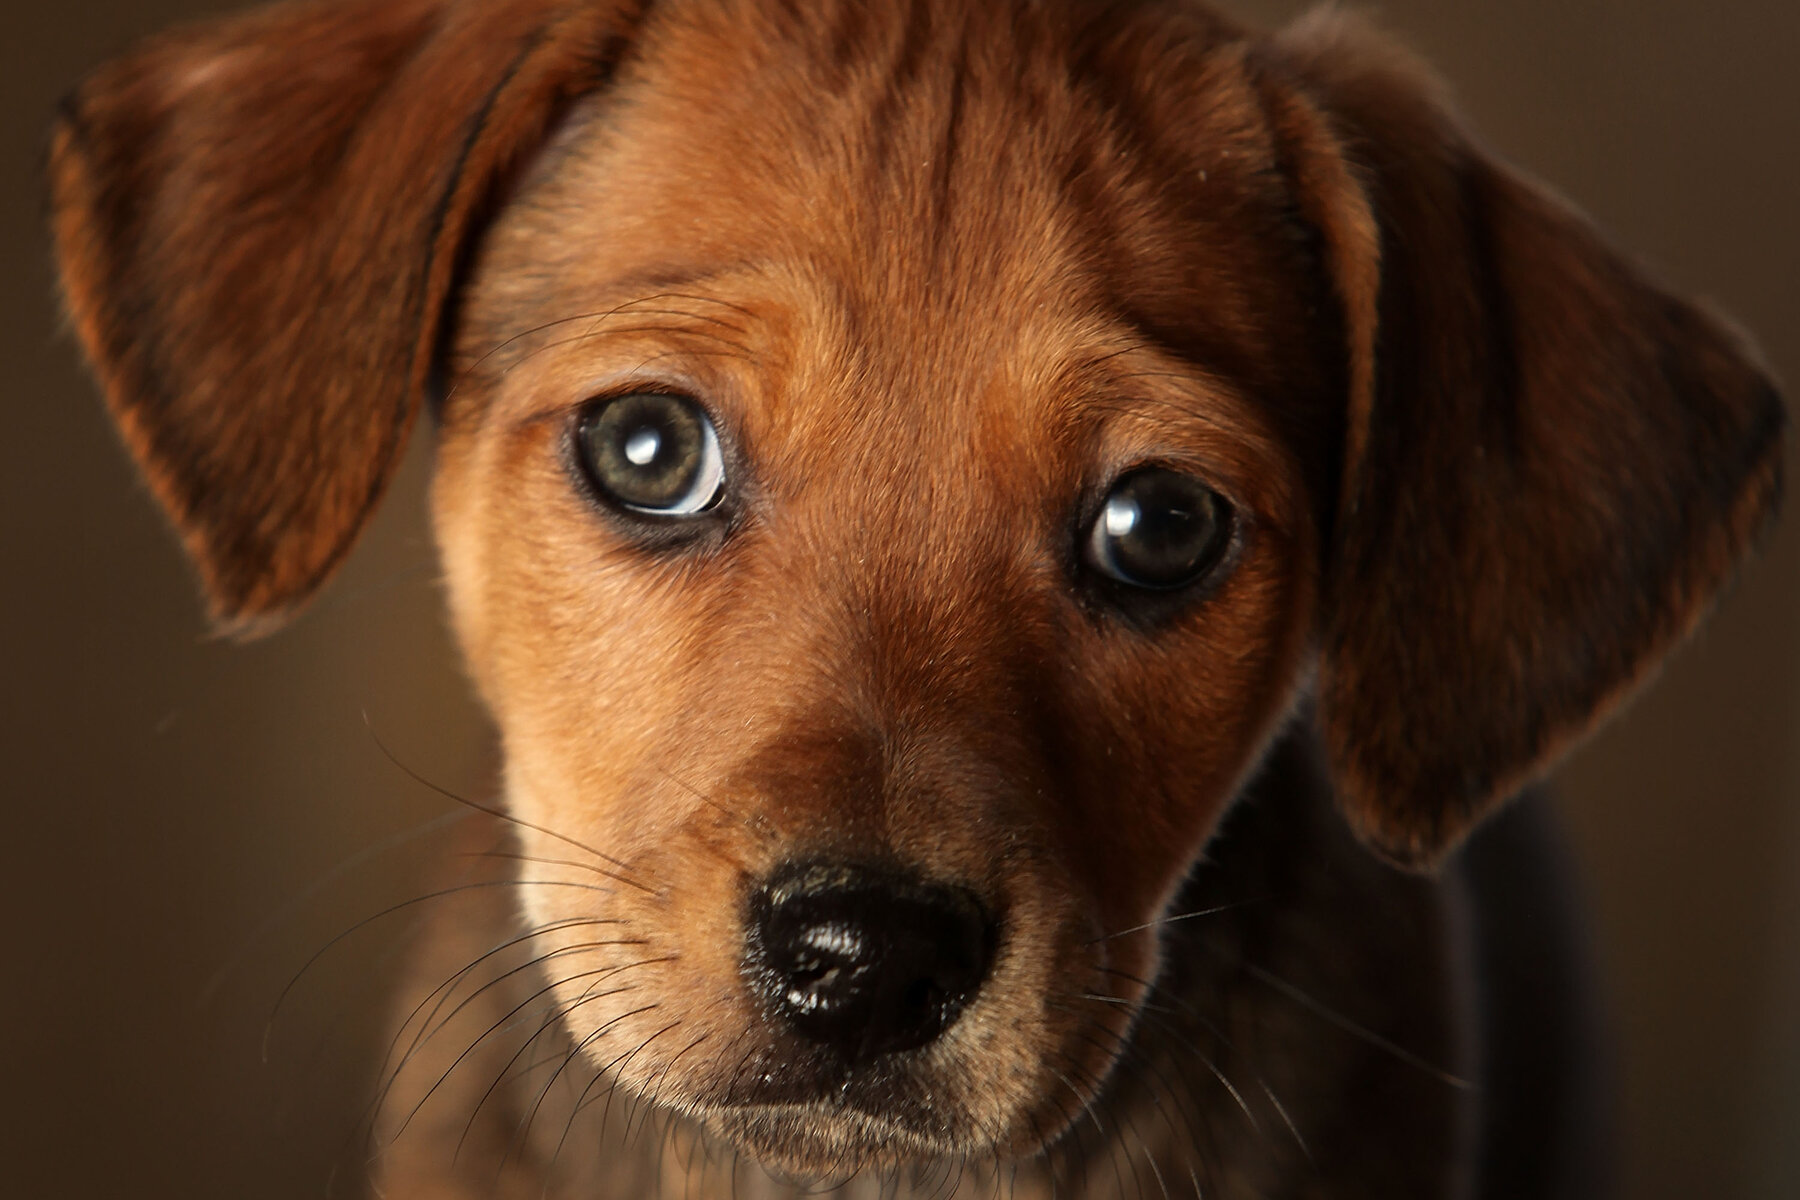

In [10]:
from IPython.display import display

display(image)

In [11]:
# import ipyplot

# ipyplot.plot_images(images_array, max_images=20, img_width=150)

### saving image

In [12]:
file_name = "images/original/image10.jpeg"
image = Image.open(file_name)
image.save("images/save/image10_copy.jpeg")   

## download images from URL

In [15]:
import io
from PIL import Image
import requests

def download_image(url, image_file_path):
    r = requests.get(url, timeout=4.0)
    if r.status_code != requests.codes.ok:
        assert False, 'Status code error: {}.'.format(r.status_code)

    with Image.open(io.BytesIO(r.content)) as im:
        im.save(image_file_path)

    print('Image downloaded from url: {} and saved to: {}.'.format(url, image_file_path))

## convert jpeg to png in bulk

In [20]:
import os
import time


counter = 0
dir_path = "images/original/"
new_dir_path = "images/png/"
old_extension = '.jpeg'
new_extension = '.png'

t1 = time.time()

for file in os.listdir(dir_path):
    if file.endswith(old_extension):
        file_name, file_exension = file.split('.')
        
        i = Image.open(os.path.join(dir_path, file))
        new_name = f"{file_name}{new_extension}"
        i.save(os.path.join(new_dir_path, new_name))
        
        counter += 1
        
t2 = time.time()

print(f"converted {counter} files and took {round((t2-t1), 4)} s")

converted 36 files and took 12.117 s


## resize images in bulk

In [22]:
import os
import time

width = 300
counter = 0

dir_path = "images/original/"
new_dir_path = fr"images/{width}/"
extension = '.jpeg'
image_size = (width, width)

t1 = time.time()

for file in os.listdir(dir_path):
    if file.endswith(extension):
        file_name, _ = file.split('.')
        
        i = Image.open(os.path.join(dir_path, file))
        i.thumbnail(image_size)  # thumbnail keep the original aspect ratio
        # meaning no distortion; actually thumbnail only focous on length after resizing to that
        # length, if image width is higher than given size then width will be choped off
        # otherwise only length: 
        
        new_name = f"{file_name}_{width}{extension}"
        i.save(os.path.join(new_dir_path, new_name))
        
        counter += 1
        
t2 = time.time()

print(f"converted {counter} files and took {round((t2-t1), 4)} s")

converted 36 files and took 0.6199 s


## image properties
___

size gives the (length, width)

format gives file format (like png, ipg, jpeg, svg etc)

mode gives the channel format ( RGB, BGR, HSV etc)

In [25]:
i = Image.open("images/original/image15.jpeg")
print(f"from original dir :\nsize: {i.size}\nformat: {i.format}\ncolor-MODE: {i.mode}")

print("-" * 30)

i = Image.open("images/300/image15_300.jpeg")
print(f"from 300 dir :\nsize: {i.size}\nformat: {i.format}\ncolor-MODE: {i.mode}")

from original dir :
size: (1800, 1200)
format: JPEG
color-MODE: RGB
------------------------------
from 300 dir :
size: (300, 200)
format: JPEG
color-MODE: RGB


## rotating images

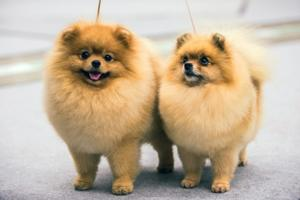

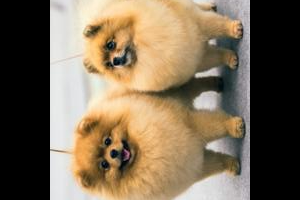

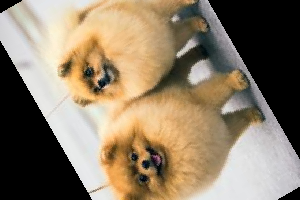

In [28]:
from IPython.display import display

im = Image.open("images/300/image0_300.jpeg")
display(im) # before rotating

display(im.rotate(90)) #in deg
display(im.rotate(120))

## convert image in black and white mode

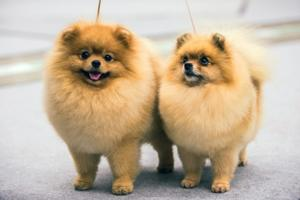

size: (300, 200)
format: JPEG
color-MODE: RGB


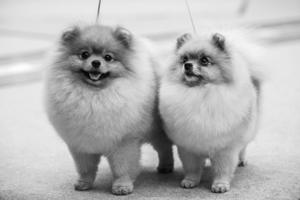

size: (300, 200)
format: None
color-MODE: L


In [30]:
from IPython.display import display

im = Image.open("images/300/image0_300.jpeg")
display(im)
print(f"size: {im.size}\nformat: {im.format}\ncolor-MODE: {im.mode}")

im = im.convert(mode='L')
display(im)  # in PIL L = black and white
print(f"size: {im.size}\nformat: {im.format}\ncolor-MODE: {im.mode}")

## bluring image

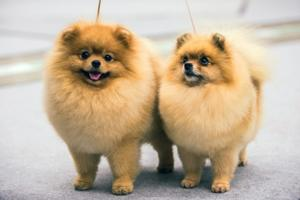

size: (300, 200)
format: JPEG
color-MODE: RGB


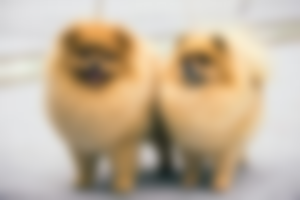

size: (300, 200)
format: None
color-MODE: RGB


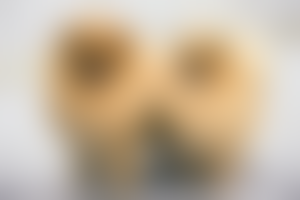

size: (300, 200)
format: None
color-MODE: RGB


In [33]:
from IPython.display import display
from PIL import Image, ImageFilter


im = Image.open("images/300/image0_300.jpeg")
display(im)
print(f"size: {im.size}\nformat: {im.format}\ncolor-MODE: {im.mode}")


im1 = im.filter(ImageFilter.GaussianBlur(5))
display(im1)
print(f"size: {im1.size}\nformat: {im1.format}\ncolor-MODE: {im1.mode}")


im2 = im.filter(ImageFilter.GaussianBlur(15))
display(im2)
print(f"size: {im2.size}\nformat: {im2.format}\ncolor-MODE: {im2.mode}")

## loading image through numpy

In [38]:
import numpy as np


im = Image.open("images/300/image0_300.jpeg")


image_arr = np.array(im)
print(image_arr.shape)
print(image_arr)


im_black_white = im.convert(mode='L')
image_arr = np.array(im_black_white)
print(image_arr.shape)
print(image_arr)

(200, 300, 3)
[[[203 203 205]
  [203 203 205]
  [204 204 206]
  ...
  [201 200 205]
  [200 199 204]
  [199 198 203]]

 [[203 203 205]
  [204 204 206]
  [205 205 207]
  ...
  [201 200 205]
  [201 200 205]
  [200 199 204]]

 [[205 205 207]
  [205 205 207]
  [206 206 208]
  ...
  [202 201 206]
  [201 200 205]
  [200 199 204]]

 ...

 [[114 114 126]
  [125 125 137]
  [138 136 149]
  ...
  [164 161 172]
  [164 161 172]
  [159 156 167]]

 [[110 110 122]
  [124 124 136]
  [130 130 142]
  ...
  [153 151 164]
  [141 139 152]
  [128 126 139]]

 [[117 117 129]
  [129 129 141]
  [129 129 141]
  ...
  [153 151 164]
  [124 122 135]
  [ 97  95 108]]]
(200, 300)
[[203 203 204 ... 201 200 199]
 [203 204 205 ... 201 201 200]
 [205 205 206 ... 202 201 200]
 ...
 [115 126 138 ... 163 163 158]
 [111 125 131 ... 153 141 128]
 [118 130 130 ... 153 124  97]]


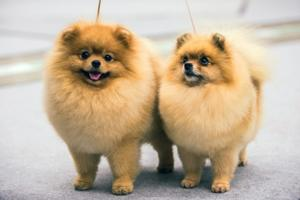

In [42]:
image

## cropping
___
To extract a sub-rectangle from an image, use the crop() method.

Copying a subrectangle from an image
box = (100, 100, 400, 400)
region = im.crop(box)
The region is defined by a 4-tuple, where coordinates are (left, upper, right, lower). The Python Imaging Library uses a coordinate system with (0, 0) in the upper left corner

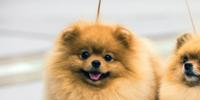

In [44]:
left = 0
top = 0
right = 200
bottom = 100

image.crop((left, top, right, bottom))

## flipping image

In [49]:
from matplotlib import pyplot as plt


%matplotlib inline

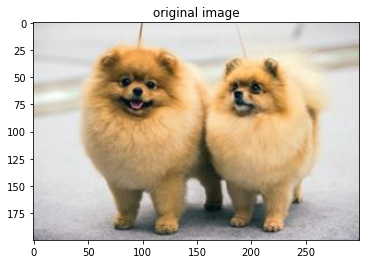

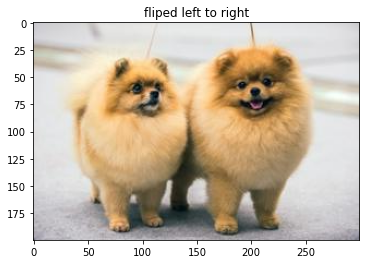

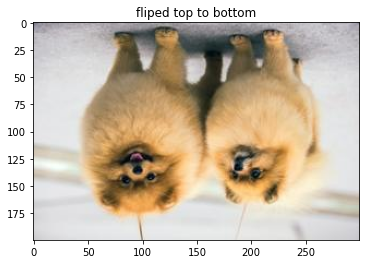

In [54]:
plt.imshow(image)
plt.title("original image")
plt.show()

plt.imshow(image.transpose(Image.FLIP_LEFT_RIGHT))
plt.title("fliped left to right")
plt.show()

plt.imshow(image.transpose(Image.FLIP_TOP_BOTTOM))
plt.title("fliped top to bottom")
plt.show()

## Resizing Images
___
This function changed the size of images in terms of width and height. This function accepts a dual tuple pair that is new size of image and it return Image object.
PIL.Image.

###  Different Interpolation techniques
___

#### PIL.Image.NEAREST
Pick one nearest pixel from the input image. Ignore all other input pixels.

#### PIL.Image.BOX
Each pixel of source image contributes to one pixel of the destination image with identical weights. For upscaling is equivalent of NEAREST. This filter can only be used with the resize() and thumbnail() methods.

New in version 3.4.0.

#### PIL.Image.BILINEAR
For resize calculate the output pixel value using linear interpolation on all pixels that may contribute to the output value. For other transformations linear interpolation over a 2x2 environment in the input image is used.

#### PIL.Image.HAMMING
Produces a sharper image than BILINEAR, doesn’t have dislocations on local level like with BOX. This filter can only be used with the resize() and thumbnail() methods.

New in version 3.4.0.

#### PIL.Image.BICUBIC
For resize calculate the output pixel value using cubic interpolation on all pixels that may contribute to the output value. For other transformations cubic interpolation over a 4x4 environment in the input image is used.

#### PIL.Image.LANCZOS
Calculate the output pixel value using a high-quality Lanczos filter (a truncated sinc) on all pixels that may contribute to the output value. This filter can only be used with the resize() and thumbnail() methods.

___

| Filter | Downscaling quality | Upscaling quality | Performance |
|--------|---------------------|-------------------|-------------|
|NEAREST |                     |                   |⭐⭐⭐⭐⭐ |
|BOX     |⭐                   |                   |⭐⭐⭐⭐   |
|BILINEAR|⭐                   |⭐                |⭐⭐⭐      |
|HAMMING |⭐⭐                |                   |⭐⭐⭐      |
|BICUBIC |⭐⭐⭐              |⭐⭐⭐           |⭐⭐         |
|LANCZOS |⭐ ⭐ ⭐⭐          |⭐⭐⭐⭐        | ⭐           |

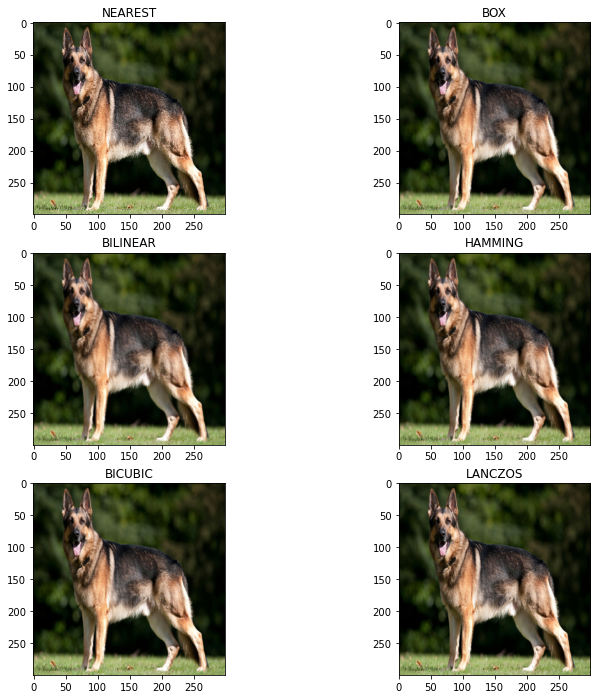

In [91]:
image = Image.open("images/original/image21.jpeg")
newSize = (300, 300)
plt.figure(figsize=(12, 12))

resizedImage1 = image.resize(newSize, Image.NEAREST)
plt.subplot(3, 2, 1)
plt.imshow(resizedImage1)
plt.title("NEAREST")

resizedImage1 = image.resize(newSize, Image.BOX)
plt.subplot(3, 2, 2)
plt.imshow(resizedImage1)
plt.title("BOX")


resizedImage1 = image.resize(newSize, Image.BILINEAR)
plt.subplot(3, 2,3)
plt.imshow(resizedImage1)
plt.title("BILINEAR")


resizedImage1 = image.resize(newSize, Image.HAMMING)
plt.subplot(3, 2, 4)
plt.imshow(resizedImage1)
plt.title("HAMMING")


resizedImage1 = image.resize(newSize, Image.BICUBIC)
plt.subplot(3, 2, 5)
plt.imshow(resizedImage1)
plt.title("BICUBIC")


resizedImage1 = image.resize(newSize, Image.LANCZOS)
plt.subplot(3, 2, 6)
plt.imshow(resizedImage1)
plt.title("LANCZOS")
plt.show()

# [For more details click here](https://www.youtube.com/watch?v=dkp4wUhCwR4)